In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

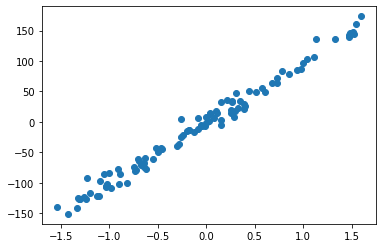

In [2]:
x, y = make_regression(n_samples=100, n_features=2, noise=10)
plt.scatter(x[:,0], y)

In [4]:
print(x.shape)
print(y.shape)

y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 2)
(100,)
(100, 1)


In [7]:
#Matrice X
X = np.hstack((x, np.ones((x.shape[0], 1))))
print(X.shape)
print(X[:10])

(100, 3)
[[ 0.15505516  1.66339655  1.        ]
 [-0.905216    0.58202056  1.        ]
 [-1.428092    0.98828553  1.        ]
 [ 1.51529009 -1.34235359  1.        ]
 [-1.22582036 -0.31343056  1.        ]
 [ 0.39497493 -0.02679034  1.        ]
 [-0.7028425  -1.06786926  1.        ]
 [-0.05082011  0.47646288  1.        ]
 [-0.00542201  1.85303725  1.        ]
 [ 1.59962589  0.26246668  1.        ]]


In [8]:
theta = np.random.randn(3, 1)
theta

array([[ 0.23005296],
       [ 0.67437159],
       [-0.11033003]])

In [12]:
def model(X, theta):
    return X.dot(theta)

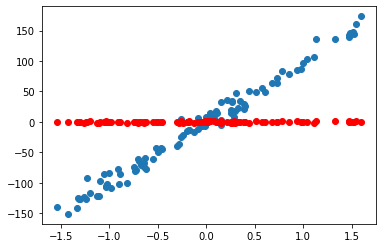

In [14]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], model(X,theta), c='red')

In [15]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [16]:
cost_function(X, y, theta)

3260.2529790526837

In [17]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [18]:
def gradient_descent(X, y, theta, learning_rate, n):
    cost_history = np.zeros(n)
    for i in range(n):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [19]:
theta_final, cost_history = gradient_descent(X, y, theta, 0.01, 1000)

In [20]:
theta_final

array([[98.64953201],
       [ 3.07357631],
       [-0.63582219]])

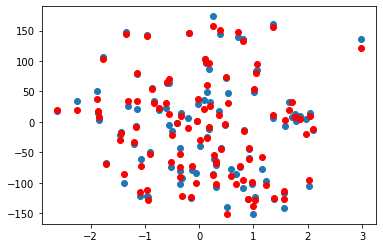

In [24]:
predictions = model(X, theta_final)
plt.scatter(x[:,1], y)
plt.scatter(x[:,1], predictions, c='r')

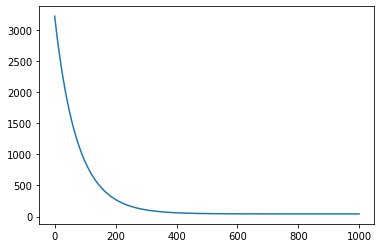

In [26]:
plt.plot(range(1000), cost_history)

In [27]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum() 
    v = ((y - y.mean())**2).sum()
    return 1 - (u/v)

In [28]:
coef_determination(y, predictions)

0.9866778710011368